# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data/train.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
x_train, y_train = train['features'], train['labels']
x_test, y_test = test['features'], test['labels']


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = x_train.shape[0]

# TODO: Number of testing examples.
n_test = x_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = (x_train.shape[1], x_train.shape[2])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print("Number of channels = ", x_train.shape[3])

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43
Number of channels =  3


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

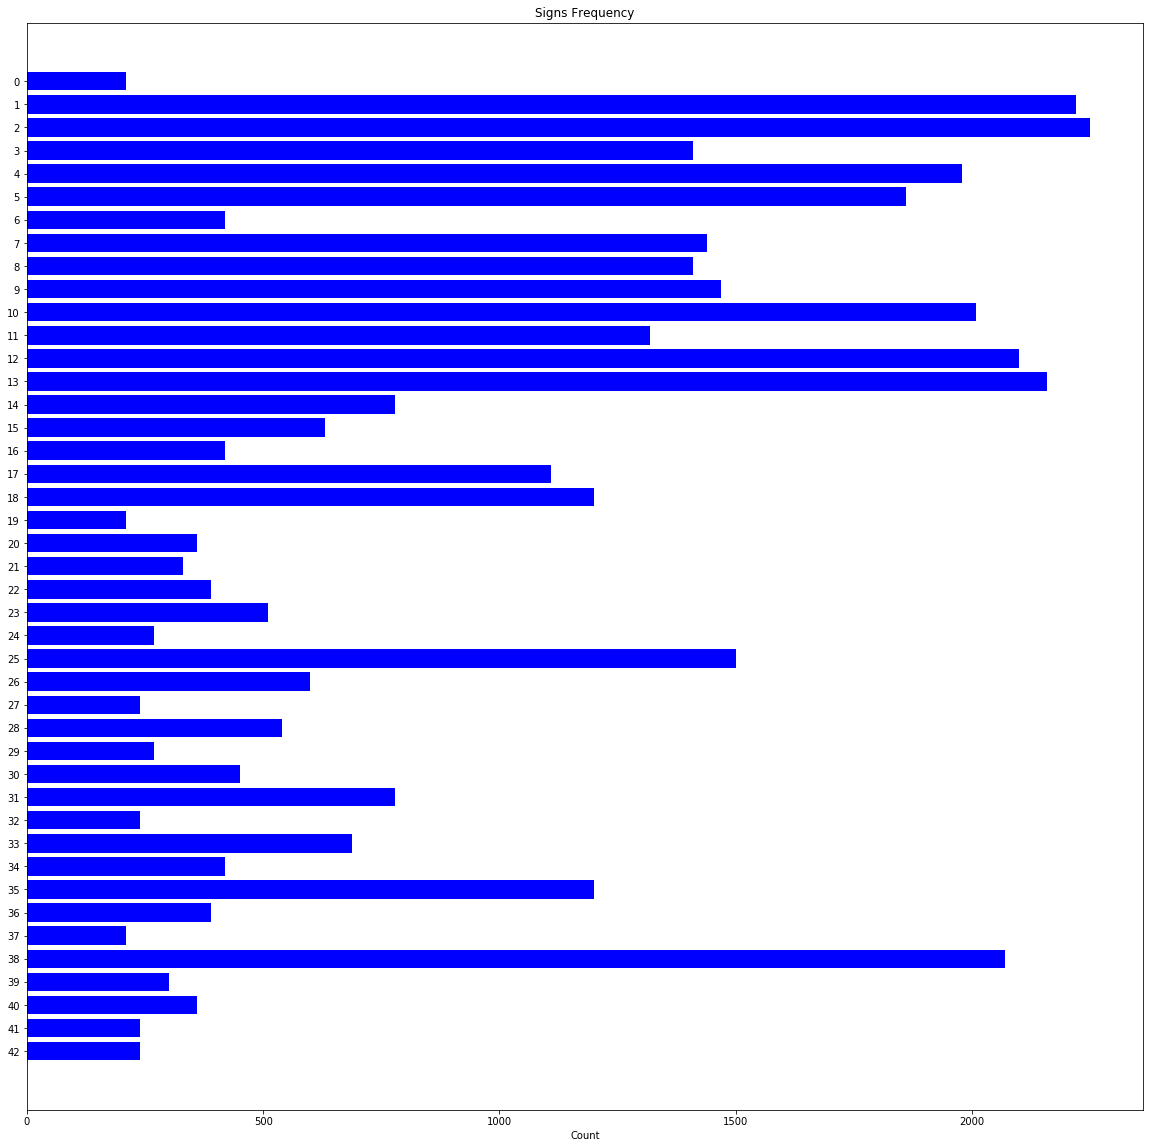

In [3]:
# Visualizations will be shown in the notebook.
import numpy as np
import matplotlib.pyplot as plt

bincount= np.bincount(y_train)
y_pos = np.arange(min(y_train), max(y_train) + 1, 1.0)

figure, ax = plt.subplots()
ax.barh(y_pos, bincount, align="center", color="blue")
ax.set_yticks(y_pos)
ax.set_yticklabels([str(i) for i in range(0, n_classes)])
ax.invert_yaxis() # labels read top-to-bottom
ax.set_xlabel("Count")
ax.set_title("Signs Frequency")

figure.set_size_inches(20, 20)

plt.show()
%matplotlib inline


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
import cv2

def to_gray(img_array):
    new_array = []
    for i in range(len(img_array)):
        new_array.append(cv2.cvtColor(img_array[i], cv2.COLOR_RGB2GRAY))
    new_array = np.array(new_array).reshape((-1,32,32,1))
    return new_array

x_train = to_gray(x_train)
x_test = to_gray(x_test)

x_train, y_train = shuffle(x_train, y_train)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** I shuffled the training data. This is to avoid batches having similar input examples. I also to converted to grayscale every image to have a depth of 1 instead of depth 3 RGB has.

In [5]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from sklearn.model_selection import train_test_split

x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.2)

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** The testing data was already loaded from a pickled file at the top of the program. I splitted the Training set to create the Validation set, assigning to it 20% of the training data.

In [6]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from tensorflow.contrib.layers import flatten

EPOCHS = 30
BATCH_SIZE = 200

# Implementing LeNet-5
def LeNet(x):
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # LAYER 1: Convolutional
    # Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    
    # Activation
    conv1 = tf.nn.relu(conv1)
    
    # Pooling. Input = 28x28x6. Output = 14x14x16
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # LAYER 2: Convolutional
    # Input = 14x14x16. Output = 10x10x16
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Flatten. Input = 5x5x16. Output = 400.
    fc0 = flatten(conv2)
    
    # LAYER 3: Fully Connected. 
    # Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1 = tf.nn.relu(fc1)
    
    # LAYER 4: Fully Connected. 
    # Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)
    
    # LAYER 5: Fully Connected.
    # Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** It's a reimplementation of the LeNet model. It has 5 layers of which the first two are convolutional, and the last 3 are fully connected layers.

The input for the first convolutional layer is of shape 32x32x1, this is the image converted from an RGB representation which has a depth of 3, to grayscale which makes the image have a depht of 1.

We don't have to add a border of 0s to the image to make padding work since the original images already have the desired shape.

The first layer transforms the Tensor 32x32x1 to 28x28x6. We use a filter with shape (5, 5, 1, 6) with "VALID" padding. Strides equal 1. And we use a ReLU activation function. We make use of Max Pooling to reduce the size of the input to let the network focus on the most important elements. After Pooling the shape is 14x14x16.

The second layer transforms the Tensor 14x14x16 to 10x10x16. We use a filter with shape (5, 5, 10, 16). Everything else is similar to the first layer.

Then we flatten the tensor from 5x5x16 to 400. Batch size is still the same. We flatten the tensor to make ir ready for our fully connected layer.

The third layer and fourth and fifth layers are Fully Connected. We keep using ReLU as activation function after the third and fourth layer. We have an output of shape 43 (The number of possible classes) after the application of the fifth layer. Then we calculate the logits for it.

In [7]:
### Train your model here.
### Feel free to use as many code cells as needed.

# Features and Labels
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

In [8]:
# Training Pipeline.
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [9]:
# Model evaluation.
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [10]:
# Train the model.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(x_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        x_train, y_train = shuffle(x_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = x_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(x_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.685

EPOCH 2 ...
Validation Accuracy = 0.836

EPOCH 3 ...
Validation Accuracy = 0.864

EPOCH 4 ...
Validation Accuracy = 0.906

EPOCH 5 ...
Validation Accuracy = 0.928

EPOCH 6 ...
Validation Accuracy = 0.934

EPOCH 7 ...
Validation Accuracy = 0.945

EPOCH 8 ...
Validation Accuracy = 0.951

EPOCH 9 ...
Validation Accuracy = 0.953

EPOCH 10 ...
Validation Accuracy = 0.952

EPOCH 11 ...
Validation Accuracy = 0.962

EPOCH 12 ...
Validation Accuracy = 0.961

EPOCH 13 ...
Validation Accuracy = 0.965

EPOCH 14 ...
Validation Accuracy = 0.960

EPOCH 15 ...
Validation Accuracy = 0.960

EPOCH 16 ...
Validation Accuracy = 0.959

EPOCH 17 ...
Validation Accuracy = 0.970

EPOCH 18 ...
Validation Accuracy = 0.966

EPOCH 19 ...
Validation Accuracy = 0.966

EPOCH 20 ...
Validation Accuracy = 0.967

EPOCH 21 ...
Validation Accuracy = 0.973

EPOCH 22 ...
Validation Accuracy = 0.970

EPOCH 23 ...
Validation Accuracy = 0.972

EPOCH 24 ...
Validation Accura

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

I used an AdamOptimizer to work on the logits. AdamOptimizer is a bit more advanced than Stochastic Gradient Descent, we use it here because it tends to converge faster.

Batch = 200
Epochs = 30
learning rate = 0.001

Batch is used to make the learning faster. That is, instead of using all of the data, we take a small randomized portion (batch) and train the model with it.

Epochs is used to avoid the model from overfitting. We restrict how many iterations the model will do before it starts memorizing the data.

Learning rate is used to control how "fast" we learn. That is, how fast we converge to a solution. A Big Learning rate > 0.01 is probably not desired since in some case might cause the model to never converge at all.

Result:
Validation Accuracy around 0.97

Validation Accuracy is one of the measures we use to check if our model is really learning and generalizing on the learnt information. This is calculated using a separate dataset from the training set and letting the model do predictions on that data. Then we check the actual answer with the model's answer to see how accurate it is.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:** I started of using the LeNet implementation we had seen in class. Did some small modifications to support 43 classes instead of the 10 that MNIST required. I also had to convert the images from RGB to grayscale this is to go from depth 3 to depth 1, this also removes some of the complexity while training. 

I chose LeNet because is a well known convolutional network to recognize patterns in images.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

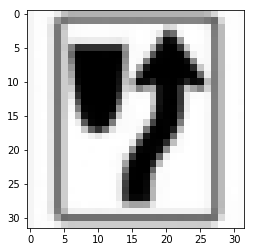

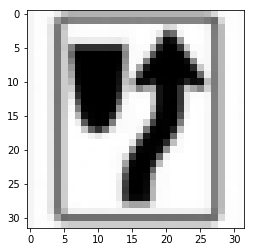

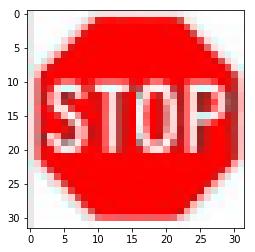

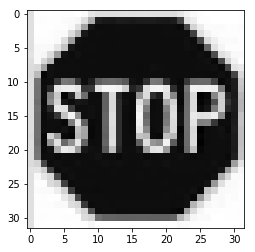

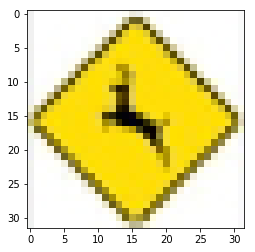

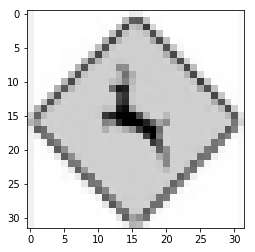

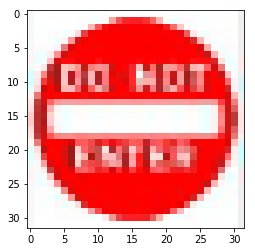

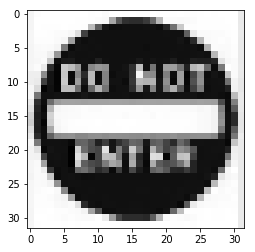

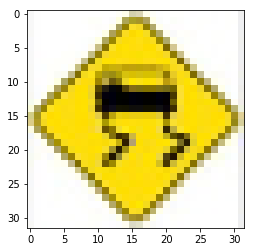

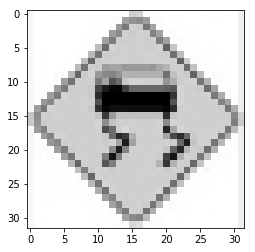

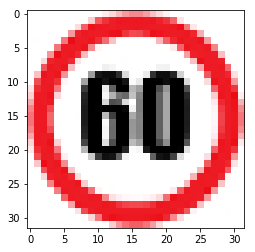

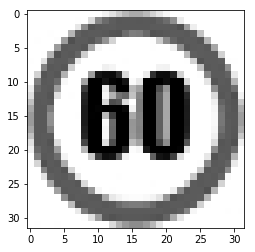

In [11]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

custom_signs = []

# Read the images and display them in rgb and grayscale.
for i in range(1, 7):
    custom_sign = cv2.imread("custom-signs/sign" + str(i) + ".jpg")
    # Images are read as BGR we have to transform it to their original color format RGB
    custom_sign = cv2.cvtColor(custom_sign, cv2.COLOR_BGR2RGB)
    plt.imshow(custom_sign)
    plt.show()
    custom_signs.append(custom_sign)
    plt.imshow(cv2.cvtColor(custom_sign, cv2.COLOR_RGB2GRAY), cmap="gray")
    plt.show()

custom_signs = to_gray(custom_signs)

x_custom_test = custom_signs
y_custom_test = [38, 14, 31, 9, 23, 3]

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

I decided to test this model with some american traffic signs. I expect the model to be bad at classifying them since they are very different from their european counterparts.

It won't have a lot of trouble with the european signs I provided.

**Answer:**
Before I evaluate the model on the images I downloaded I'd like to first evaluate it with the test data.

In [12]:
# Test accuracy
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    loader = tf.train.import_meta_graph('lenet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))

    test_accuracy = evaluate(x_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.907


**Answer:**
With a Test accuracy around 0.9, we're ready to evaluate the model on new data.

In [13]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, './lenet')
    
    custom_test_accuracy = evaluate(x_custom_test, y_custom_test)
    print("Custom Test Accuracy = {:.3f}".format(custom_test_accuracy))

Custom Test Accuracy = 0.167


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**
The model predicted correctly 1 out of 6 signs, it's 16% accurate with the data given. The model performs significantly worst when compare with testing on the dataset. I think this is because a lot of the signs I used (except for one) are american and the images in the dataset seem to be from europe.

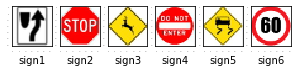

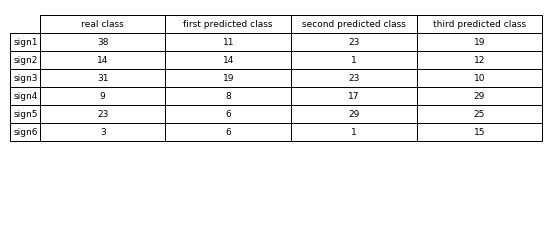

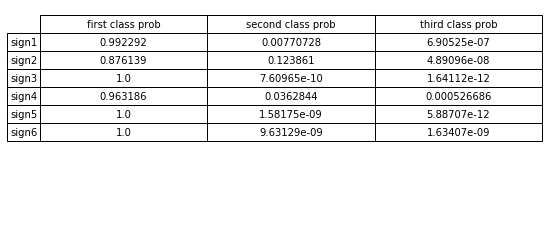

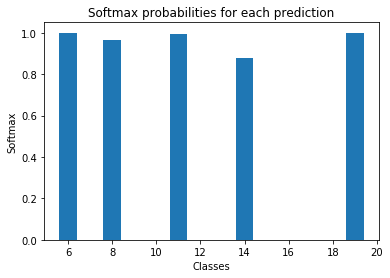

In [18]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

custom_softmax = tf.nn.softmax(logits)

with tf.Session() as sess:
    saver.restore(sess, './lenet')
    
    # for images from internet
    custom_softmax_prob = sess.run(custom_softmax, feed_dict={x: x_custom_test})
    #print(custom_softmax_prob)
    custom_top_k_op = tf.nn.top_k(custom_softmax_prob, 3)
    top_k_values, top_k_indices = sess.run(custom_top_k_op)
    
    # Plot the data
    def showImagesHorizontally(list_of_files):
        fig = plt.figure(figsize = (5, 5))
        number_of_files = len(list_of_files)
        for i in range(number_of_files):
            ax = fig.add_subplot(1, number_of_files, i+1)
            image = cv2.imread(list_of_files[i])
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            ax.tick_params(axis="both", which= "both", length = 0, labelsize = 1)
            plt.imshow(image)
            plt.xlabel("sign" + str(i + 1))

            
    files = ["custom-signs/sign" + str(i) + ".jpg" for i in range(1, 7)] 
    showImagesHorizontally(files)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.axis('off')
    rows = ["sign" + str(i) for i in range(1, 7)]
    cols = ["real class", "first predicted class", "second predicted class", "third predicted class"]
    
    data = np.insert(top_k_indices, 0, y_custom_test, axis=1)
    
    table = ax.table(cellText=data, colLabels=cols, rowLabels=rows, loc='upper center', cellLoc='center')
    table.auto_set_font_size(True)
    table.scale(1.5,1.5)
    plt.show()
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.axis('off')
    rows = ["sign" + str(i) for i in range(1, 7)]
    cols = ["first class prob", "second class prob", "third class prob"]
    table = ax.table(cellText=top_k_values, colLabels=cols, rowLabels=rows, loc='upper center', cellLoc='center')
    table.auto_set_font_size(True)
    table.scale(1.5,1.5)
    plt.show()
    
    
    custom_top_1_op = tf.nn.top_k(custom_softmax_prob, 1)
    top_1_values, top_1_indices = sess.run(custom_top_1_op)
    
    
    plt.bar(top_1_indices, top_1_values)
    plt.xlabel("Classes")
    plt.ylabel("Softmax")
    plt.title("Softmax probabilities for each prediction")
    plt.show()


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**
As we can see from the tables and plots I've displayed above, the model seems to be very certain when it classifies an image. The first prediction probability is orders of magnitude bigger than the second and third prediction.

The model is very bad prediction what the american traffic signs are. The correct class doesn't appear for the top 3 predicted classes for any of the samples it got wrongly classified. This is rather obvious since most of the traffics signs differ significantly from their european counterparts.

If we wanted this model be used in america we would train it with american traffic signs.

The good news is that it worked well with the european traffic sign I provided.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.